In [6]:
import numpy as np
import trimesh
import sys
from typing import List 
from IPython.display import clear_output, SVG
from pydrake.all import (
    AddMultibodyPlantSceneGraph,
    Concatenate,
    DiagramBuilder,
    MeshcatVisualizer,
    MeshcatVisualizerParams,
    Parser,
    PointCloud,
    RigidTransform,
    StartMeshcat,
    UniformlyRandomRotationMatrix,
    Context,
    Diagram,
    PointCloud,
    Simulator,
    TrajectorySource,
    Solve,
    RotationMatrix,
    MultibodyPlant
)
from pydrake.geometry import Meshcat
from pydrake.multibody import inverse_kinematics

from manipulation.station import MakeHardwareStation, load_scenario
from manipulation.meshcat_utils import AddMeshcatTriad
from manipulation import running_as_notebook
from manipulation.scenarios import AddFloatingRpyJoint, AddRgbdSensors, ycb, AddMultibodyTriad, MakeManipulationStation
from manipulation.utils import ConfigureParser
from manipulation.clutter import GraspCandidateCost, GenerateAntipodalGraspCandidate
from manipulation.icp import IterativeClosestPoint
from manipulation.station import AddPointClouds

# Own utils
from hwstation.add_objects import get_library_scenario_data, get_library_scenario_data_without_robot
from enum import Enum

from hwstation.utils import visualize_diagram, init_diagram, fix_input_port, filterCollsionGeometry, get_iiwa_joint_state

In [7]:
# Start meshcat
try:
    meshcat = Meshcat(7010)
except:
    pass #This error appears if this cell is executed twice (port 7006 is already taken then)

scenario_data = get_library_scenario_data()
diagram_plan, visualizer, simulator = init_diagram(meshcat, scenario_data)
fix_input_port(diagram_plan, simulator)
diagram_plan_context = diagram_plan.CreateDefaultContext()
scene_graph = diagram_plan.GetSubsystemByName("station").GetSubsystemByName("scene_graph")
sg_context = scene_graph.GetMyContextFromRoot(diagram_plan_context)
filterCollsionGeometry(scene_graph, sg_context)
q0_home = get_iiwa_joint_state(diagram_plan, diagram_plan_context)
simulator.AdvanceTo(1.0)


Station input port size:  <pydrake.systems.framework.InputPort object at 0x7fff8e3d69b0>
plant.GetStateNames():  102
plant.GetActuatorNames():  12
Fixing input port of size:  20
Fixing input port of size:  1


==== LCM Warning ===
LCM detected that large packets are being received, but the kernel UDP
receive buffer is very small.  The possibility of dropping packets due to
insufficient buffer space is very high.

For more information, visit:
   http://lcm-proj.github.io/lcm/multicast_setup.html

==== LCM Warning ===
LCM detected that large packets are being received, but the kernel UDP
receive buffer is very small.  The possibility of dropping packets due to
insufficient buffer space is very high.

For more information, visit:
   http://lcm-proj.github.io/lcm/multicast_setup.html

==== LCM Warning ===
LCM detected that large packets are being received, but the kernel UDP
receive buffer is very small.  The possibility of dropping packets due to
insufficient buffer space is very high.

For more information, visit:
   http://lcm-proj.github.io/lcm/multicast_setup.html



udp_read_packet -- select:: Interrupted system call
udp_read_packet -- select:: Interrupted system call
udp_read_packet -- select:: Interrupted system call


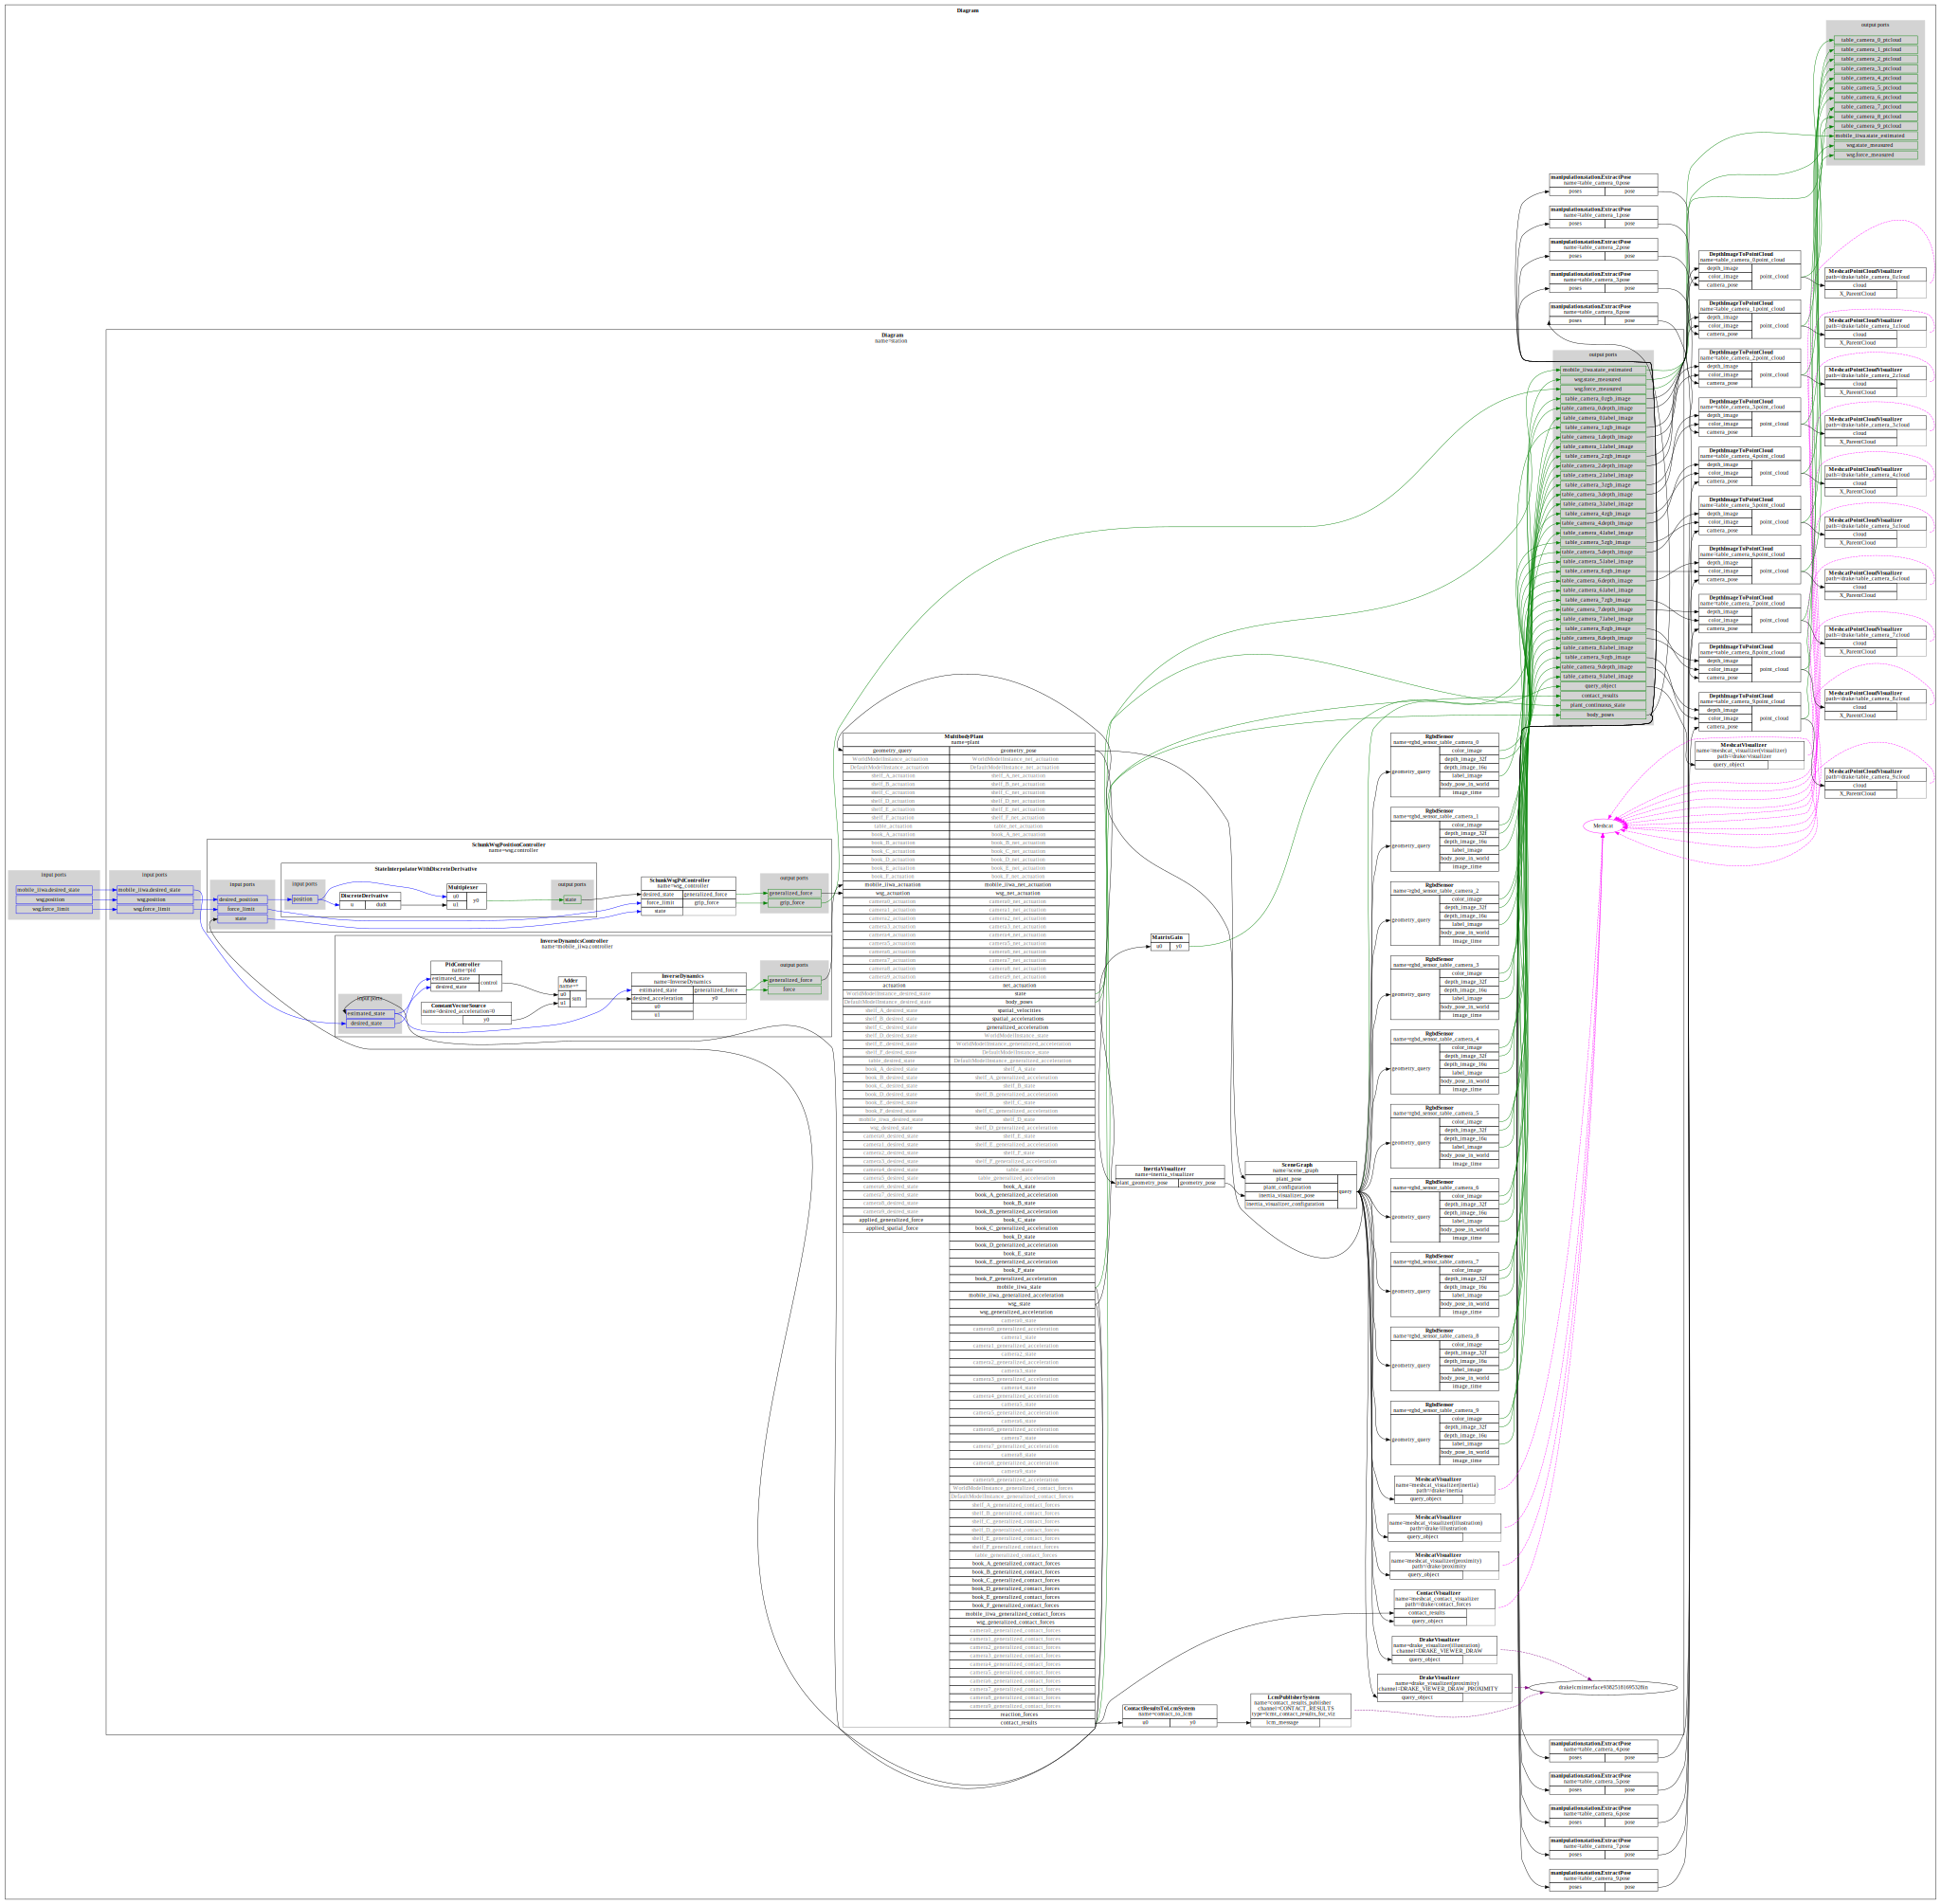

In [10]:
visualize_diagram(diagram_plan)